#### Load the data

In [8]:
# PimaIndianDiatetes.csv -> Indian Woman Diabetes Dataset
# https://mitu.co.in/dataset

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('datasets/PimaIndiansDiabetes.csv')

In [11]:
df

,TimesPregnant,GlucoseConcentration,BloodPrs,SkinThickness,Serum,BMI,DiabetesFunct,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Separate the input and output variables

In [13]:
x = df.drop('Class', axis = 1) 
y = df['Class']

In [14]:
x.shape

(768, 8)

In [15]:
y.value_counts()

Class
0    500
1    268
Name: count, dtype: int64

In [17]:
y.value_counts() / len(y)

Class
0    0.651042
1    0.348958
Name: count, dtype: float64

#### Build the model

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [29]:
model = Sequential()

model.add(Input((8,)))

model.add(Dense(16, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [30]:
from keras.utils import plot_model

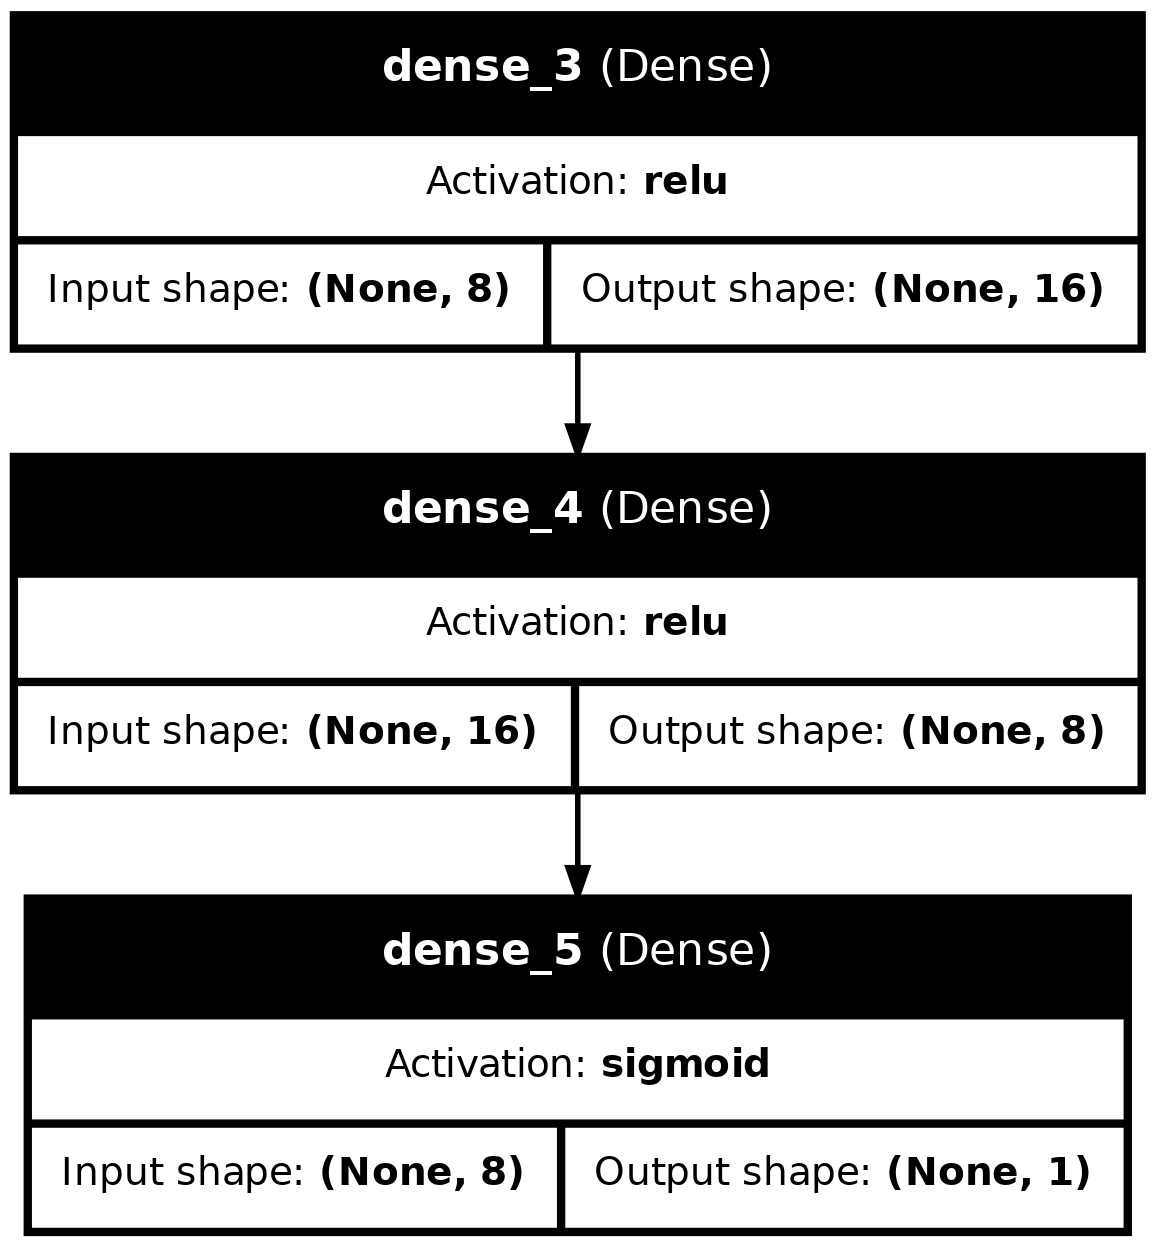

In [31]:
plot_model(model, show_layer_activations=True, 
           show_layer_names=True, show_shapes=True)

#### Compile the model

In [33]:
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

#### Train the model

In [36]:
model.fit(x ,y, epochs=30, batch_size=5)

Epoch 1/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6954 - loss: 0.6257
Epoch 2/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7044 - loss: 0.5685
Epoch 3/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7351 - loss: 0.5639
Epoch 4/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7271 - loss: 0.6116
Epoch 5/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7197 - loss: 0.5929
Epoch 6/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7172 - loss: 0.5891
Epoch 7/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7360 - loss: 0.6655
Epoch 8/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7218 - loss: 0.5686
Epoch 9/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7217 - loss: 0.5481
Epoch 10/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7378 - loss: 0.5678
Epoch 11/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7401 - loss: 0.5525
Epoch 12/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

#### Cross Validation

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [40]:
x_train.shape

(576, 8)

In [41]:
model.fit(x_train ,y_train, epochs=50, batch_size=1)

Epoch 1/50
576/576 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6641 - loss: 0.7708
Epoch 2/50
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6900 - loss: 0.8000
Epoch 3/50
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7014 - loss: 0.6268
Epoch 4/50
576/576 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7199 - loss: 0.6407
Epoch 5/50
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6931 - loss: 0.5801
Epoch 6/50
576/576 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6994 - loss: 0.6092
Epoch 7/50
576/576 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7044 - loss: 0.5880
Epoch 8/50
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6851 - loss: 0.5594
Epoch 9/50
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7384 - loss: 0.5509
Epoch 10/50
576/576 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7390 - loss: 0.5505
Epoch 11/50
576/576 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6572 - loss: 0.6142
Epoch 12/50
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

#### Evaluate the model

In [43]:
model.evaluate(x_test, y_test, batch_size=1);

192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.7083 - loss: 0.6861


In [48]:
newdf = pd.DataFrame(data=[[2,122,70,27,0,36.8,0.340,27]], 
                     columns=x.columns)

In [49]:
newdf

,TimesPregnant,GlucoseConcentration,BloodPrs,SkinThickness,Serum,BMI,DiabetesFunct,Age
0,2,122,70,27,0,36.8,0.34,27


In [50]:
model.predict(newdf)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[0.58753705]], dtype=float32)

In [52]:
if model.predict(newdf, verbose=False)[0][0] > 0.5: 
    print(1) 
else:
    print(0)

1
